In [1]:
# automatically update imports
%load_ext autoreload
%autoreload 2

# For graphs
%matplotlib inline

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [0]:
import extract_uses.parameters as parameters
import extract_uses.utils as eu_utils

# City to download: Chandigarh
city_ref = "raleigh_north-carolina"
cities_folder = 'cities/'
# Population count file
# popu_count_file = "/home/lgervasoni/gpw-v4-population-count-adjusted-to-2015-unwpp-country-totals-2000/gpw-v4-population-count-adjusted-to-2015-unwpp-country-totals_2000.tif"

# Get the required cities shapefile
eu_utils.getCityShapefile(cities_folder, [ city_ref ])

# Set input files
parameters.setInputFiles(cities_folder, city_ref, popu_count_file=None, numberOfCuts = 4)

In [0]:
import extract_uses.main

# Note: If city_country.h5 exists in hdfs store, avoid extracting uses
extract_uses.main.process()

In [2]:
import loaders

city_ref = "raleigh_north-carolina"
cities_folder = 'cities/'

uses_shp = cities_folder+city_ref+"/full_uses.shp"
bbox = [35.7590107, -79.11595072949167, 36.050888099999995, -78.57705101411202] # eu_utils.getBoundingBox(uses_shp)

# geo_graph = loaders.load_graph(city_country, bbox)
pois = loaders.load_pois(city_ref, uses_shp)
# centrality = loaders.load_graph_centrality(city_country, geo_graph)
# kde = loaders.load_grid_kde(city_ref, pois, bbox)

Found ['pois'] stored locally
Querying locally for `['pois']`


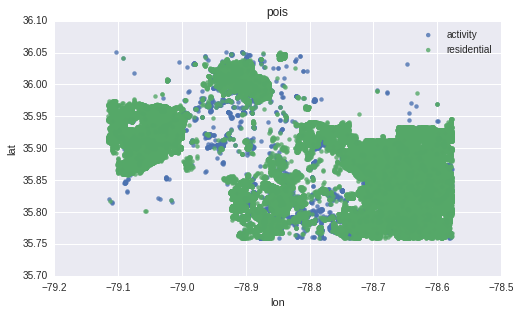

In [3]:
import plots

plots.pois_scatter(pois, overlap=True)

In [3]:
import spatial_measures
import utils

xx, yy = utils.grid_from_bbox(bbox, .0025)

f = spatial_measures.grid_cell_pois_count(pois, xx, yy)

In [20]:
# entropy = spatial_measures.relative_entropy(f)
moran = spatial_measures.moran_index(f, xx, yy)
geary = spatial_measures.geary_index(f, xx, yy)

In [21]:
print(moran, geary)

(0.10850023785777255, 0.87293810708095898)


In [4]:
f_act_count = spatial_measures.grid_cell_pois_count(pois[pois['category']=='activity'], xx, yy)
f_res_count = spatial_measures.grid_cell_pois_count(pois[pois['category']=='residential'], xx, yy)
f_act_kde = spatial_measures.grid_cell_kde_average(kde['activity'].values)
f_res_kde = spatial_measures.grid_cell_kde_average(kde['residential'].values)

In [5]:
moran_act_count = spatial_measures.moran_index(f_act_count, xx, yy)
moran_res_count = spatial_measures.moran_index(f_res_count, xx, yy)
geary_act_count = spatial_measures.geary_index(f_act_count, xx, yy)
geary_res_count = spatial_measures.geary_index(f_res_count, xx, yy)

moran_act_kde = spatial_measures.moran_index(f_act_kde, xx, yy)
moran_res_kde = spatial_measures.moran_index(f_res_kde, xx, yy)
geary_act_kde = spatial_measures.geary_index(f_act_kde, xx, yy)
geary_res_kde = spatial_measures.geary_index(f_res_kde, xx, yy)

entropy_act_kde = spatial_measures.relative_entropy(f_act_kde)
entropy_res_kde = spatial_measures.relative_entropy(f_res_kde)

In [8]:
print("Moran")
print("\tActivities: count %f, kde %f" % (moran_act_count, moran_act_kde))
print("\tResidential: count %f, kde %f" % (moran_res_count, moran_res_kde))

print("Geary")
print("\tActivities: count %f, kde %f" % (geary_act_count, geary_act_kde))
print("\tResidential: count %f, kde %f" % (geary_res_count, geary_res_kde))

print("Entropy")
print("\tActivities: kde %f" % entropy_act_kde)
print("\tResidential: kde %f" % entropy_res_kde)

Moran
	Activities: count 0.014662, kde 0.082529
	Residential: count 0.105339, kde 0.063000
Geary
	Activities: count 0.970942, kde 0.936652
	Residential: count 0.876098, kde 0.952226
Entropy
	Activities: kde 0.938944
	Residential: kde 0.916230
